In [21]:
import tellurium as te; te.setDefaultPlottingEngine('matplotlib')
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
model = '''
#functions # q: 1 fuer act, 0 fuer rep

#allgemeine funktion fuer act oder rep je nachdem ob q = 1 oder q = 0
function regfunc(U ,K ,H, q)
   ( (U/K)^H * q + 1*(1-q)) / (1 + (U/K)^H )
end

#allgemeine GateAND funktion
function gateand(U1, K1, U2, K2, H, q1, q2)
    ( regfunc(U1, K1, H, q1) ) * ( regfunc(U2, K2, H, q2))
end

#allgemeine GateOR funktion fuer act oder rep je nachdem ob q = 1 oder q = 0
function gar(U, Ku, V, Kv, H, q)
    ( (U/Ku)^H * q + 1 * (1-q) ) / ( 1+ (U/Ku)^H + (V/Kv)^H )
end

#allgemeine GateOR funktion
function gateor(U1, Ku, V1, Kv, H, q1, q2)
    gar(U1, Ku, V1, Kv, H, q1) + gar(V1, Kv, U1, Ku, H, q2)
end

#allgemeines bla
function fbla(K1)
      ((1/K1)^2)  /  (1 + (1/K1)^2)
end

#allgemeiner normand
function funormand(K1, K2, K3)
    (1/K2)^2  /  (1 + (1/K2)^2) *  (fbla(K1) /K3)^2  /  (1 + (fbla(K1) /K3)^2) 
end

##allgemeines bla
#function fbla(K1, Kxy, H, P1)
#      regfunc(K1, Kxy, H, P1)
#end
#
##allgemeiner normand
#function funormand(K1, K2, K3, H, P1, P2, P3)
#    Bz + bz * gateand(1, K1, )
#end


X = 1
Z = 0
Y = 0

Sx = 0
Sy = 1
By = 0
Bz = 0
by = 1
bz = 1
ay = 1
az = 1

X1 := Sx * X
Y1 := Sy * Y

H = 2;
j=0;




#PFEILE. 1 fuer act, 0 fuer rep. P1: XnachY , P2: XnachZ, P3: YnachZ
P1 = 1
P2 = 1
P3 = 1

Kxy = 0.1
Kxz = 0.5
Kyz = 0.1



#Normierung
Xss := X
Yss := (By + by *    regfunc(Xss, Kxy ,H, P1) )  / ay # Y steady state
bla := (By + by *    regfunc(Xss, Kxy ,H, P1) )  / ay
#normand :=  (Bz + bz * funormand(Kxy, Kxz, Kyz))/az # Z steady state
ZssA :=  (Bz + bz * gateand(Xss, Kxz, Yss, Kyz, H, P2, P3))/az # Z steady state
ZssO :=  (Bz + bz * gateor(Xss, Kxz, Yss, Kyz, H, P2, P3))/az


#ODE

Y'= ( By + by * regfunc(X1, Kxy, H, P1) - ay * Y ) 
Z'= ( Bz + bz * gateand(X1, Kxz, Y1, Kyz, H, P2, P3) - az * Z )
#Z' = Bz + bz * gateor(X1, Kxz, Y1, Kyz, H, P2, P3) - az * Z

Z2 := Z / ZssA 
Z3 := Z / ZssO



#simple regulation

R = 1
S = 1
T = 0

SSx = 1
SSy = 1
By = 0
Bz = 0
by = 1
bz = 1
ay = 1
az = 1

SX1 := Sx * R
SY1 := Sy * S

H = 2;

SKxy = 0.1
SKxz = 1
SKyz= 0.1


Sbla := (By + by *    fbla(SKxy) )  / ay
Snormand := (Bz + bz * funormand(SKxy, SKxz, SKyz))/az

S' = 0
T' = (Bz + bz * gateand(SX1, SKxz, SY1, SKyz, H, P2, P3) - az * T ) 

T2 := T / (Snormand)

t1=0
t2=1
t3=4
E1: at (time>t1): Sx = 0;
E2: at (time>t2): Sx = 1;
E3: at (time>t3): Sx = 0; 

'''


In [23]:
start = 0
end = 15
steps = 1000
t2=1
t3=8

tcs = ['time', 'X', 'Y', 'Z2', 'Sx', 'Sy', 'S', 'T2', 'Z','T']

0.788907798571
0.0373587023828


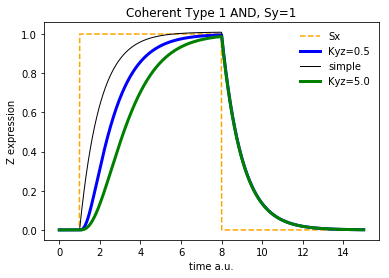

In [24]:
# COHERENT 1 AND



r=te.loada(model)

r.reset()
r['t2']=t2
r['t3']=t3

r['P1']=1
r['P2']=1
r['P3']=1

r['Kxy']=0.1
r['Kyz']=0.5
r['Kxz']=0.1

r['SKxy']=0.1
r['SKyz']=1
r['SKxz']=0.1

r.timeCourseSelections=tcs#['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T',  'Z2', 'T2']
res = r.simulate(start, end, steps)
plt.figure(1)
print(r.ZssA)
plt.plot(res['time'], res['Sx'],'--',color='orange', label='Sx')
plt.plot(res['time'], res['Z2'], linewidth=3, color='blue', label='Kyz=0.5')
plt.plot(res['time'], res['T2'], linewidth=1, color='black',   label='simple')

r.reset()
r['Kxy']=0.1
r['Kyz']=5
r['Kxz']=0.1

r['P1']=1
r['P2']=1
r['P3']=1

r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T',  'Z2', 'T2']
res=r.simulate(start, end, steps)
plt.plot(res['time'], res['Z2'], linewidth=3, color='green',  label='Kyz={0}'.format(r['Kyz']))
print(r.ZssA)

plt.title('Coherent Type 1 AND, Sy=1')
xlab= plt.xlabel('time a.u.')
ylab =plt.ylabel('Z expression')
plt.legend(frameon=False)
plt.savefig('Coherent Type 1 and')


0.989829474922


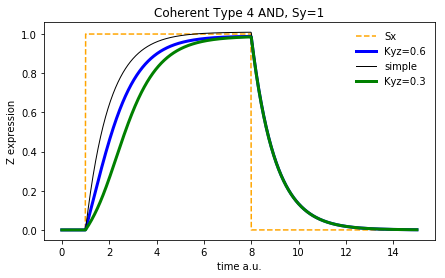

In [25]:
# COHERENT 4 AND

r=te.loada(model)

r['t2']=t2
r['t3']=t3
r['P1']=0
r['P2']=1
r['P3']=0

r['Kxy']=0.1
r['Kyz']=0.6
r['Kxz']=0.1
r['SKxy']=0.1
r['SKyz']=1
r['SKxz']=0.1
#r['t2']=3
#r['t3']=10

plt.figure(3, figsize=(7,4))

r.timeCourseSelections=tcs#['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T', 'Z2', 'T2']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Sx'],'--',color='orange', label='Sx')
plt.plot(res['time'], res['Z'], linewidth=3, color='blue',  label='Kyz=0.6')
plt.plot(res['time'], res['T2'], linewidth=1, color='black', label='simple')

print(r.ZssA)


r.resetToOrigin()
r['t2']=t2
r['t3']=t3
r['P1']=0
r['P2']=1
r['P3']=0

r['Kxy']=0.1
r['Kyz']=0.3
r['Kxz']=0.1
r['SKxy']=0.1
r['SKyz']=1
r['SKxz']=0.1


res2=r.simulate(start, end, steps)
plt.plot(res2['time'], res2['Z'], linewidth=3, color='green', label='Kyz=0.3')

plt.title('Coherent Type 4 AND, Sy=1')
xlab= plt.xlabel('time a.u.')
ylab =plt.ylabel('Z expression')
plt.legend(frameon=False)

plt.savefig('Coherent Type 4 and')

3.88083884332e-06
3.88234536832e-08


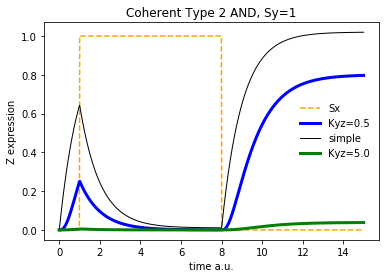

In [30]:
# Coherent Typ 2
r=te.loada(model)

r.reset()
r['t2']=t2
r['t3']=t3

r['P1']=0
r['P2']=0
r['P3']=1

r['Kxy']=0.1
r['Kyz']=0.5
r['Kxz']=0.1

r['SKxy']=0.1
r['SKyz']=1
r['SKxz']=0.1

r.timeCourseSelections=tcs#['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T',  'Z2', 'T2']
res = r.simulate(start, end, steps)
plt.figure(1)
print(r.ZssA)
plt.plot(res['time'], res['Sx'],'--',color='orange', label='Sx')
plt.plot(res['time'], res['Z'], linewidth=3, color='blue', label='Kyz=0.5')
plt.plot(res['time'], res['T2'], linewidth=1, color='black',   label='simple')

r.reset()
r['Kxy']=0.1
r['Kyz']=5
r['Kxz']=0.1

r['P1']=0
r['P2']=0
r['P3']=1

r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T',  'Z2', 'T2']
res=r.simulate(start, end, steps)
plt.plot(res['time'], res['Z'], linewidth=3, color='green',  label='Kyz={0}'.format(r['Kyz']))
print(r.ZssA)

plt.title('Coherent Type 2 AND, Sy=1')
xlab= plt.xlabel('time a.u.')
ylab =plt.ylabel('Z expression')
plt.legend(frameon=False)

plt.savefig('Coherent Type 2 and')

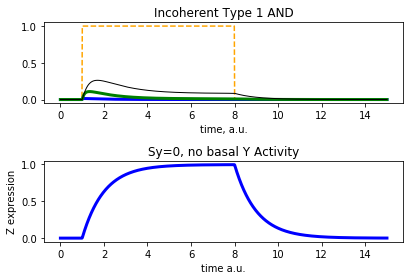

In [31]:
# INCOHERENT 1 AND Sy=1



r=te.loada(model)
r['t2']=t2
r['t3']=t3

r['P1']=1
r['P2']=1
r['P3']=0

r['Kxy']=0.1
r['Kyz']=0.01
r['Kxz']=0.1


fig, axes = plt.subplots(2,1)
#fig.set_figwidth(10)
#fig.set_figheight(10)
ax1=axes[1]
plt.title('Incoherent Type 1 AND')
r.timeCourseSelections=tcs#['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T']
res = r.simulate(start, end, steps)
axes[0].plot(res['time'], res['Sx'],'--',color='orange', label='Sx')
axes[0].plot(res['time'], res['Z'], linewidth=3, color='blue', label='Kyz=0.01')
#plt.plot(res['time'], res['T'], linewidth=1, color='black')


r.reset()
r['Kyz']=0.1
res=r.simulate(start, end, steps)
axes[0].plot(res['time'], res['Z'], linewidth=3, color='green', label='Kyz=0.1')

r.reset()
r['Kyz']=0.3
res=r.simulate(start, end, steps)
axes[0].plot(res['time'], res['Z'], linewidth=1, color='black', label='Kyz=0.3')
axes[0].set_xlabel('time, a.u.')
axes[0].set_title('Incoherent Type 1 AND')

xlab= plt.xlabel('time a.u.')
ylab =plt.ylabel('Z expression')
plt.legend(frameon=False)
plt.tight_layout()

r.reset()
r['t2']=t2
r['t3']=t3

r['P1']=1
r['P2']=1
r['P3']=0

r['Kxy']=0.1
r['Kyz']=0.01
r['Kxz']=0.1


r['Sy'] = 0

plt.figure(4)
r.timeCourseSelections=tcs#['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T']
res = r.simulate(start, end, steps)

axes[1].plot(res['time'], res['Z'], linewidth=3, color='blue', label='Kyz=0.01')
axes[1].set_title('Sy=0, no basal Y Activity')
plt.savefig('Incoherent Type 1 and with sy=0')


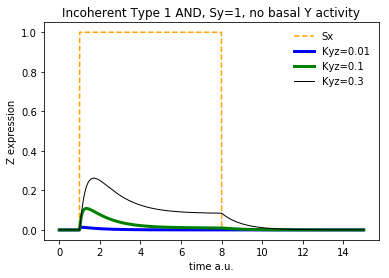

In [32]:
# INCOHERENT 1 AND Sy=1



r=te.loada(model)
r['t2']=t2
r['t3']=t3

r['P1']=1
r['P2']=1
r['P3']=0

r['Kxy']=0.1
r['Kyz']=0.01
r['Kxz']=0.1



plt.title('Incoherent Type 1 AND, Sy=1, no basal Y activity')
r.timeCourseSelections=tcs#['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Sx'],'--',color='orange', label='Sx')
plt.plot(res['time'], res['Z'], linewidth=3, color='blue', label='Kyz=0.01')
#plt.plot(res['time'], res['T'], linewidth=1, color='black')


r.reset()
r['Kyz']=0.1
res=r.simulate(start, end, steps)
plt.plot(res['time'], res['Z'], linewidth=3, color='green', label='Kyz=0.1')

r.reset()
r['Kyz']=0.3
res=r.simulate(start, end, steps)
plt.plot(res['time'], res['Z'], linewidth=1, color='black', label='Kyz=0.3')

xlab= plt.xlabel('time a.u.')
ylab =plt.ylabel('Z expression')
plt.legend(frameon=False)
plt.savefig('Incoherent Type 1 and')

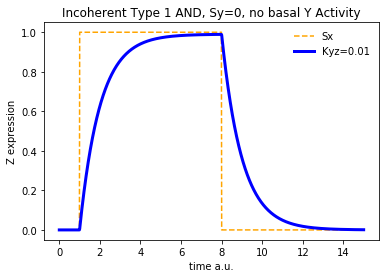

In [33]:
# INCOHERENT 1 AND Sy=0



r=te.loada(model)
r['t2']=t2
r['t3']=t3

r['P1']=1
r['P2']=1
r['P3']=0

r['Kxy']=0.1
r['Kyz']=0.01
r['Kxz']=0.1


r['Sy'] = 0

plt.figure(4)
r.timeCourseSelections=tcs#['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Sx'],'--',color='orange', label='Sx')
plt.plot(res['time'], res['Z'], linewidth=3, color='blue', label='Kyz=0.01')
plt.title('Incoherent Type 1 AND, Sy=0, no basal Y Activity')

xlab= plt.xlabel('time a.u.')
ylab =plt.ylabel('Z expression')
plt.legend(frameon=False)

plt.savefig('Incoherent Type 1 and only sy=0')

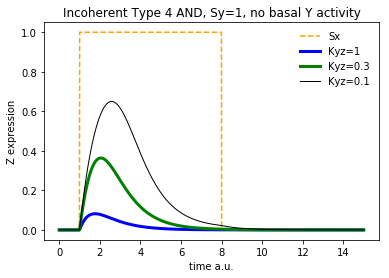

In [34]:
# INCOHERENT 4 AND Sy=1 und Sy=0



r=te.loada(model)
r['t2']=t2
r['t3']=t3

r['P1']=0
r['P2']=1
r['P3']=1

r['Kxy']=0.1
r['Kyz']= 1
r['Kxz']=0.1
r['SKyz']=1


plt.figure(5)
r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Sx'],'--',color='orange', label='Sx')
plt.plot(res['time'], res['Z'], linewidth=3, color='blue', label='Kyz=1')

r.reset()
r['Kyz']=0.3
res=r.simulate(start, end, steps)
plt.plot(res['time'], res['Z'], linewidth=3, color='green', label='Kyz=0.3')

r.reset()
r['Kyz']=0.1
res=r.simulate(start, end, steps)
plt.plot(res['time'], res['Z'], linewidth=1, color='black', label='Kyz=0.1')

#r.reset()
#r['Sy']=0
#res=r.simulate(start, end, steps)
#plt.plot(res['time'], res['Z'], linewidth=4, color='lightblue')

plt.title('Incoherent Type 4 AND, Sy=1, no basal Y activity')
plt.legend(frameon=False)
xlab= plt.xlabel('time a.u.')
ylab =plt.ylabel('Z expression')
plt.savefig('Incoherent Type 4 and ')

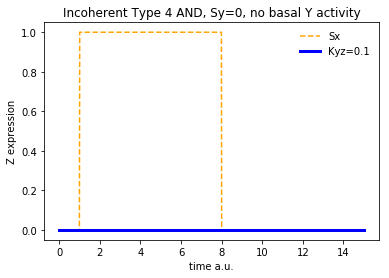

In [35]:
# INCOHERENT 4 AND Sy=0


r=te.loada(model)
r['t2']=t2
r['t3']=t3

r['P1']=0
r['P2']=1
r['P3']=1

r['Kxy']=0.1
r['Kyz']= 0.1
r['Kxz']=0.1

r['SKyz']=1


r['Sy'] = 0

plt.figure(4)
r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Sx'],'--',color='orange',label='Sx')
plt.plot(res['time'], res['Z'], linewidth=3, color='blue', label='Kyz=0.1')
#plt.plot(res['time'], res['T'], linewidth=1, color='black', label='simple')

plt.title('Incoherent Type 4 AND, Sy=0, no basal Y activity')
plt.legend(frameon=False)
xlab= plt.xlabel('time a.u.')
ylab =plt.ylabel('Z expression')
plt.savefig('Incoherent Type 4 and only sy=0')

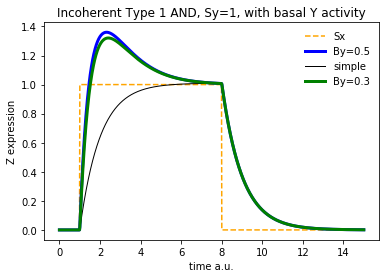

In [36]:
# INCOHERENT 1 AND WITH BASAL Y Activity



r=te.loada(model)
r['t2']=t2
r['t3']=t3

r['P1']=1
r['P2']=1
r['P3']=0

r['Kxy']=1
r['Kyz']= 0.5
r['Kxz']=1
r['SKxy']=0.1
r['SKyz']=1
r['SKxz']=0.1
r['By']= 0.5

plt.figure(5)
r.timeCourseSelections=tcs#['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Sx'],'--',color='orange', label='Sx')
plt.plot(res['time'], res['Z2'], linewidth=3, color='blue', label='By=0.5')
plt.plot(res['time'], res['T2'], linewidth=1, color='black', label='simple')

r.reset()
r['By']=0.3

res=r.simulate(start, end, steps)
plt.plot(res['time'], res['Z2'], linewidth=3, color='green', label='By=0.3')

plt.title('Incoherent Type 1 AND, Sy=1, with basal Y activity')
plt.legend(frameon=False)
xlab= plt.xlabel('time a.u.')
ylab =plt.ylabel('Z expression')
plt.savefig('Incoherent Type 1 and with basal Y')

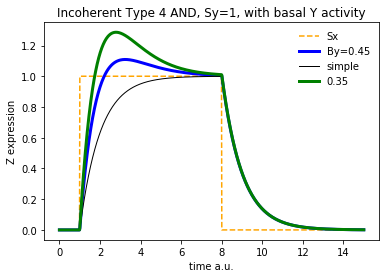

In [38]:
# INCOHERENT 4 AND WITH BASAL



r=te.loada(model)
r['t2']=t2
r['t3']=t3

r['P1']=0
r['P2']=1
r['P3']=1

r['Kxy']=0.1
r['Kyz']= 0.5
r['Kxz']=1

r['By']=0.45
#r['Y'] = 1



plt.figure(6)
r.timeCourseSelections=tcs#['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Sx'],'--',color='orange', label='Sx')
plt.plot(res['time'], res['Z2'], linewidth=3, color='blue', label='By=0.45')
plt.plot(res['time'], res['T2'], linewidth=1, color='black', label='simple')

r.reset()
r['By']=0.35
res=r.simulate(start, end, steps)
plt.plot(res['time'], res['Z2'], linewidth=3, color='green', label='0.35')

plt.title('Incoherent Type 4 AND, Sy=1, with basal Y activity')
plt.legend(frameon=False)
xlab= plt.xlabel('time a.u.')
ylab =plt.ylabel('Z expression')
plt.savefig('Incoherent Type 4 and with basal Y')

In [39]:
modelOR = '''
#functions # q: 1 fuer act, 0 fuer rep

#allgemeine funktion fuer act oder rep je nachdem ob q = 1 oder q = 0
function regfunc(U ,K ,H, q)
   ( (U/K)^H * q + 1*(1-q)) / (1 + (U/K)^H )
end

#allgemeine GateAND funktion
function gateand(U1, K1, U2, K2, H, q1, q2)
    ( regfunc(U1, K1, H, q1) ) * ( regfunc(U2, K2, H, q2))
end

#allgemeine GateOR funktion fuer act oder rep je nachdem ob q = 1 oder q = 0
function gar(U, Ku, V, Kv, H, q)
    ( (U/Ku)^H * q + 1 * (1-q) ) / ( 1+ (U/Ku)^H + (V/Kv)^H )
end

#allgemeine GateOR funktion
function gateor(U1, Ku, V1, Kv, H, q1, q2)
    gar(U1, Ku, V1, Kv, H, q1) + gar(V1, Kv, U1, Ku, H, q2)
end

#allgemeines bla
function fbla(K1)
      ((1/K1)^2)  /  (1 + (1/K1)^2)
end

#allgemeiner normand
function funormand(K1, K2, K3)
    (1/K2)^2  /  (1 + (1/K2)^2) *  (fbla(K1) /K3)^2  /  (1 + (fbla(K1) /K3)^2) 
end


X = 1
Z = 0
Y = 0

Sx = 0
Sy = 1
By = 0
Bz = 0
by = 1
bz = 1
ay = 1
az = 1

X1 := Sx * X
Y1 := Sy * Y

H = 2;


#PFEILE. 1 fuer act, 0 fuer rep. P1: XnachY , P2: XnachZ, P3: YnachZ
P1 = 1
P2 = 1
P3 = 1

Kxy = 0.1
Kxz = 0.5
Kyz = 0.1



#Normierung
Xss := X
Yss := (By + by *    regfunc(Xss, Kxy ,H, P1) )  / ay # Y steady state
bla := (By + by *    regfunc(Xss, Kxy ,H, P1) )  / ay
#normand :=  (Bz + bz * funormand(Kxy, Kxz, Kyz))/az # Z steady state
ZssA :=  (Bz + bz * gateand(Xss, Kxz, Yss, Kyz, H, P2, P3))/az # Z steady state
ZssO :=  (Bz + bz * gateor(Xss, Kxz, Yss, Kyz, H, P2, P3))/az


#ODE

Y'= ( By + by * regfunc(X1, Kxy, H, P1) - ay * Y ) 
#Z'= ( Bz + bz * gateand(X1, Kxz, Y1, Kyz, H, P2, P3) - az * Z )
Z' = Bz + bz * gateor(X1, Kxz, Y1, Kyz, H, P2, P3) - az * Z

#Z2 := Z / ZssA 
Z3 := Z / ZssO



#simple regulation

R = 1
S = 1
T = 0

SSx = 1
SSy = 1
By = 0
Bz = 0
by = 1
bz = 1
ay = 1
az = 1

SX1 := Sx * R
SY1 := Sy * S

H = 2;

SKxy = 0.1
SKxz = 1
SKyz= 0.1


Sbla := (By + by *    fbla(SKxy) )  / ay
Snormand := (Bz + bz * funormand(SKxy, SKxz, SKyz))/az

S' = 0
T' = (Bz + bz * gateand(SX1, SKxz, SY1, SKyz, H, P2, P3) - az * T ) 

T2 := T / (Snormand)

t1=0
t2=1
t3=4
E1: at (time>t1): Sx = 0;
E2: at (time>t2): Sx = 1;
E3: at (time>t3): Sx = 0; 

'''


In [40]:
start = 0
end = 15
steps = 1000
t2=1
t3=8

tcs = ['time', 'X', 'Y', 'Sx', 'Sy', 'S','Z','T','Z3','T2']

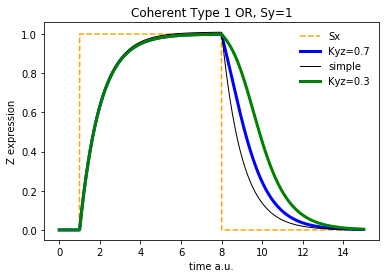

In [43]:
# COHERENT 1 OR




r=te.loada(modelOR)

plt.figure(10)
r.timeCourseSelections=tcs#['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T']
r.reset()
r['t2']=t2
r['t3']=t3

r['P1']=1
r['P2']=1
r['P3']=1

r['Kxy']=0.5
r['Kyz']=0.7
r['Kxz']=0.1

r['SKxy'] =0.1
r['SKyz']=1
r['SKxz']=0.1

r.timeCourseSelections=tcs#['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Sx'],'--',color='orange', label='Sx')
plt.plot(res['time'], res['Z3'], linewidth=3, color='blue', label='Kyz=0.7')
plt.plot(res['time'], res['T2'], linewidth=1, color='black', label='simple')

r.reset()
r['t2']=t2
r['t3']=t3

r['P1']=1
r['P2']=1
r['P3']=1

r['Kxy']=0.5
r['Kyz']=0.3
r['Kxz']=0.1


res=r.simulate(start, end, steps)
plt.plot(res['time'], res['Z3'], linewidth=3, color='green', label='Kyz=0.3')

plt.title('Coherent Type 1 OR, Sy=1')
plt.legend(frameon=False)
xlab= plt.xlabel('time a.u.')
ylab =plt.ylabel('Z expression')
plt.savefig('Coherent Type 1 or')

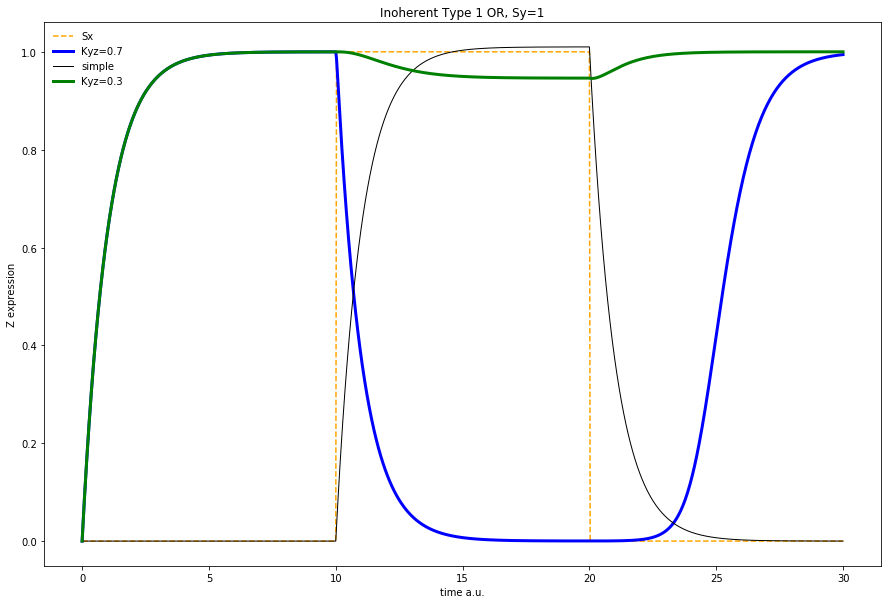

In [42]:
# COHERENT 1 OR




r=te.loada(modelOR)

plt.figure(3, figsize=(15,10))

r.timeCourseSelections=tcs#['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T']
r.reset()
r['t2']=10
r['t3']=20

r['P1']=1
r['P2']=1
r['P3']=0

r['Kxy']=0.5
r['Kyz']=0.01
r['Kxz']=2

r['SKxy'] =0.1
r['SKyz']=1
r['SKxz']=0.1

r.timeCourseSelections=tcs#['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T']
res = r.simulate(start, 30, steps)
plt.plot(res['time'], res['Sx'],'--',color='orange', label='Sx')
plt.plot(res['time'], res['Z'], linewidth=3, color='blue', label='Kyz=0.7')
plt.plot(res['time'], res['T2'], linewidth=1, color='black', label='simple')

r.reset()
r['t2']=10
r['t3']=20

r['P1']=1
r['P2']=1
r['P3']=0

r['Kxy']=0.5
r['Kyz']=3
r['Kxz']=2


res=r.simulate(start, 30, steps)
plt.plot(res['time'], res['Z'], linewidth=3, color='green', label='Kyz=0.3')

plt.title('Inoherent Type 1 OR, Sy=1')
plt.legend(frameon=False)
xlab= plt.xlabel('time a.u.')
ylab =plt.ylabel('Z expression')
plt.savefig('Incoherent Type 1 or inverse')